# Generador de grafos aleatorios en la base de los cliques.

En el siguiente código se define la variable $n$ la cual corresponde al número de vértices del grafo aleatorio a generar, luego se procede a crear un circuito cuántico por medio de la librería qiskit consistiendo en un qbit que pasa por una compuerta Hadamard la cual otorga probabilidad de $1/2$ a cada uno de sus estados, se realiza la medida del estado del qbit en un total de $n(n-1)/2$ de casos independientes y son asociados a las entradas de una matriz simétrica $A$ la cual corresponderá a la matriz de adyacencia del grafo. generado, finalmente se plotea el grafo

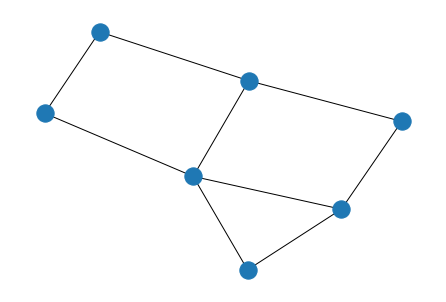

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import qiskit
from qiskit import QuantumCircuit

# Inserte acá el número de vértices del grafo a trabajar
n = 7

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure([0],[0])
# circ.draw('mpl')
SimBackend = qiskit.Aer.get_backend('qasm_simulator')

A = np.zeros((n,n))

for i in range(n+1):
    for j in range(i+1, n+1):
        Circuito = qiskit.execute(circ,backend=SimBackend,shots=1)
        A[i-1][j-1]= max(Circuito.result().get_counts(),key=Circuito.result().get_counts().get)
        A[j-1][i-1]=A[i-1][j-1]

for k in range(n+1):
    A[k-1][k-1]=0
        
G = nx.from_numpy_matrix(A)
nx.draw(G)
plt.show()